In [1]:
!pip install pyswarms


   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   -------------------- ------------------- 1/2 [pyswarms]
   -------------------- ------------------- 1/2 [pyswarms]
   -------------------- ------------------- 1/2 [pyswarms]
   ---------------------------------------- 2/2 [pyswarms]



In [2]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2025-09-23 12:03:16,196 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████|1000/1000, best_cost=1.38e-45
2025-09-23 12:03:16,961 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3798285086293237e-45, best pos: [3.01480110e-23 2.17008282e-23]


CPU times: total: 828 ms
Wall time: 772 ms


In [4]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 2, 'p': 2}

# Call instance of PSO
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2025-09-23 12:06:28,122 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████|1000/1000, best_cost=8.33e-43
2025-09-23 12:06:29,114 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 8.334062010939792e-43, best pos: [ 7.75913155e-23 -9.09607492e-22]


CPU times: total: 1.17 s
Wall time: 997 ms


In [5]:
# Create bounds
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

In [6]:

%%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin, iters=1000)

2025-09-23 12:09:31,548 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2025-09-23 12:09:32,358 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [ 1.11035788e-09 -9.61991460e-10]


CPU times: total: 953 ms
Wall time: 816 ms


In [7]:
# import modules
import numpy as np

# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
def rosenbrock_with_args(x, a, b, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f


In [8]:
from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, a=1, b=100, c=0)

2025-09-23 12:15:54,794 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████|1000/1000, best_cost=1.65e-19
2025-09-23 12:15:55,618 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6458381803511128e-19, best pos: [1. 1.]


In [9]:
kwargs={"a": 1.0, "b": 100.0, 'c':0}
cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, **kwargs)

2025-09-23 12:16:30,877 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2025-09-23 12:16:31,659 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [1. 1.]


In [10]:
import matplotlib.pyplot as plt
from IPython.display import Image
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

In [11]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2025-09-23 12:19:08,671 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.68e-8
2025-09-23 12:19:08,737 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6836810908892603e-08, best pos: [-1.48437155e-05  1.28904907e-04]


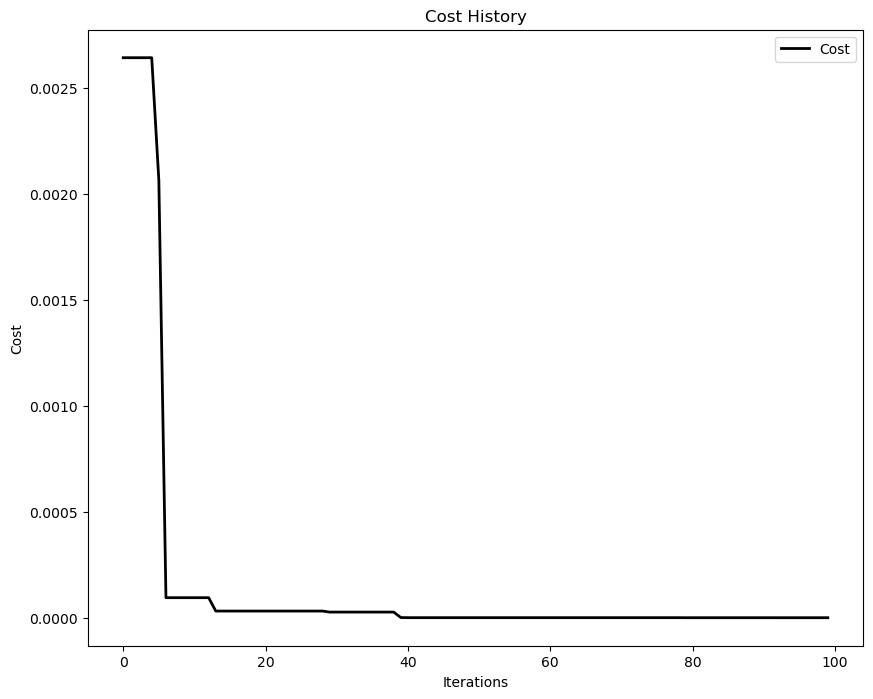

In [12]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [13]:
from pyswarms.utils.plotters.formatters import Mesher
m = Mesher(func=fx.sphere)

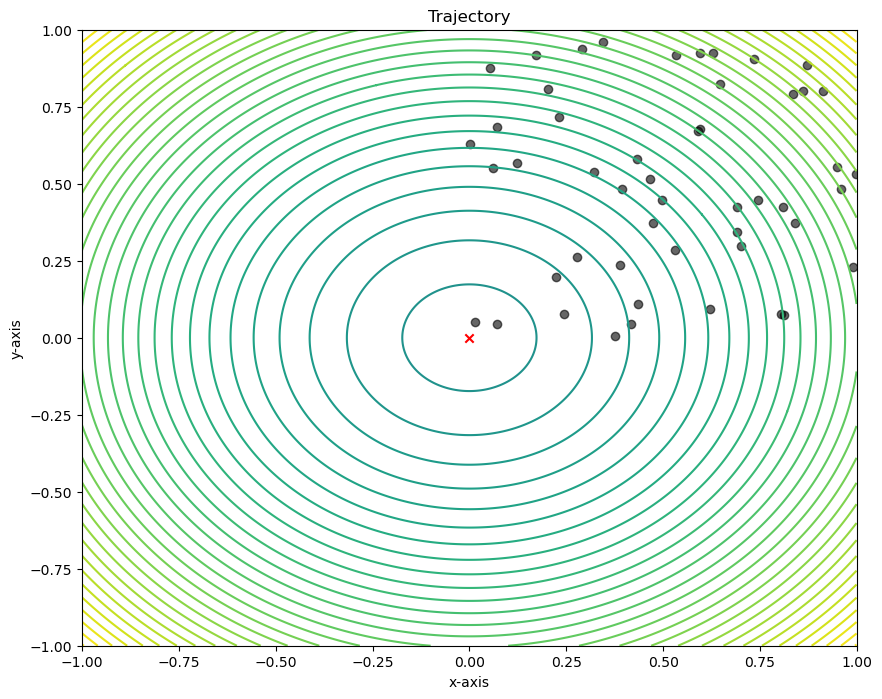

In [14]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [15]:
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2025-09-23 12:21:44,610 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2025-09-23 12:21:44,611 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
